# Zadanie 1 (1pkt)
Ustal losowe (referencyjne) x rozmiaru 1000 oraz losowe A rozmiaru 1000x1000, policz b=A*x.
Nastepnie rozwiąż równanie Ax=b trzema metodami:
- inv()
- \
- factorize()

Porównaj jakość wyniku (zmierzoną jako długość różnicy wektorów wyniku oraz referencyjnego x) oraz czas wykonania (@time). UWAGA: pierwsze wykonanie funkcji w Julii zawiera czas kompilacji tej funkcji, dlatego czas mierzymy  od drugiego wywołania !


## Dane referencyjne

In [1]:
using DataFrames
using LinearAlgebra

In [2]:
x = rand(1000)
A = rand(1000, 1000)
b = A*x;

In [3]:
measurements = DataFrame(methodName = String[], method_quality = Float32[], time = Float32[])

Row,methodName,method_quality,time
,String,Float32,Float32


In [4]:
x1=inv(A)*b  # compilation
time1 = @elapsed x1=inv(A)*b
push!(measurements, ["inversion", dot(x1-x, x1-x), time1]);

In [5]:
x1=A\b  # compilation
time1 = @elapsed x1=A\b
push!(measurements, ["backslash operator", dot(x1-x, x1-x), time1]);

In [6]:
x1 = factorize(A)\b  # compilation
time1 = @elapsed x1 = factorize(A)\b
push!(measurements, ["factorization", dot(x1-x, x1-x), time1]);

In [7]:
measurements

Row,methodName,method_quality,time
,String,Float32,Float32
1,inversion,2.19994e-22,0.0368144
2,backslash operator,3.75179e-23,0.0279529
3,factorization,3.75179e-23,0.0166369


# Zadanie 2 (1pkt)
Policz współczynniki wielomianu aproksymującego dowolne dane z poprzednich laboratoriów tworząc wprost układ równań i rozwiązujac go (metoda z użyciem faktoryzacji QR zaprezentowana na tym laboratorium).
Porównaj wyniki z tymi otrzymanymi poprzednio.


In [8]:
using CSV
using DataFrames
using Statistics
using Polynomials
using Plots

In [9]:
data = CSV.read("results-utf8.csv", DataFrame)
naive_data = filter(:type => x -> x == "naive", data)

naive_data_grouped = groupby(naive_data, [:matrix_size])
naive_data_plottable = combine(naive_data_grouped, :time => mean, :time => std)

Row,matrix_size,time_mean,time_std
,Int64,Float64,Float64
1,100,0.0104,0.00611374
2,200,0.0611,0.0149922
3,300,0.1863,0.0286514
4,400,0.4375,0.0190336
5,500,0.8848,0.0284987
6,600,1.5353,0.0487033
7,700,2.6881,0.0466368


In [21]:
x = naive_data_plottable.matrix_size
y = naive_data_plottable.time_mean;

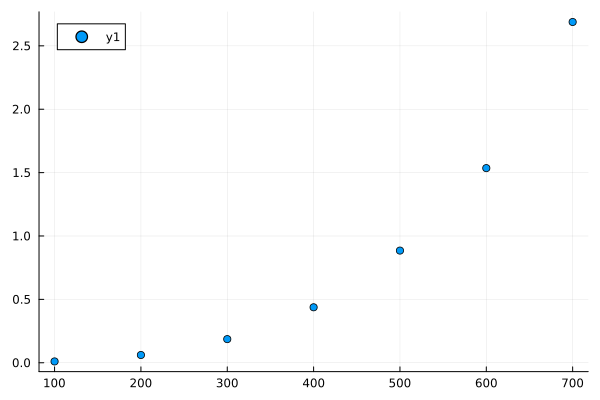

In [22]:
scatter(x, y)

In [23]:
A = zeros(7, 3)
A[:,1] = x.^2
A[:,2] = x
A[:,3] = ones(7)
A

7×3 Matrix{Float64}:
  10000.0  100.0  1.0
  40000.0  200.0  1.0
  90000.0  300.0  1.0
 160000.0  400.0  1.0
 250000.0  500.0  1.0
 360000.0  600.0  1.0
 490000.0  700.0  1.0

In [24]:
AF = factorize(A)

QRPivoted{Float64, Matrix{Float64}, Vector{Float64}, Vector{Int64}}
Q factor:
7×7 LinearAlgebra.QRPackedQ{Float64, Matrix{Float64}, Vector{Float64}}:
 -0.0146239  -0.284638    0.825029   …   0.0926492  -0.100996  -0.449477
 -0.0584955  -0.454601    0.27501        0.161339    0.426102   0.706374
 -0.131615   -0.509891   -0.0916698     -0.536469   -0.365511  -0.0276122
 -0.233982   -0.450506   -0.27501       -0.184688   -0.111987   0.00549545
 -0.365597   -0.276447   -0.27501        0.769755   -0.217049  -0.172389
 -0.52646     0.0122865  -0.0916698  …  -0.202158    0.70757   -0.396263
 -0.71657     0.415694    0.27501       -0.100428   -0.338129   0.333873
R factor:
3×3 Matrix{Float64}:
 -6.83813e5  -1146.51   -2.04734
  0.0         -292.419  -1.5481
  0.0            0.0     0.641689
permutation:
3-element Vector{Int64}:
 1
 2
 3

In [25]:
coefficients = AF.R\((Transpose(AF.Q)*y)[1:3])
least_squares_polynomial = Polynomial(reverse(coefficients))

Polynomial(0.37895714285714094 - 0.003951619047619039*x + 1.0153809523809514e-5*x^2)

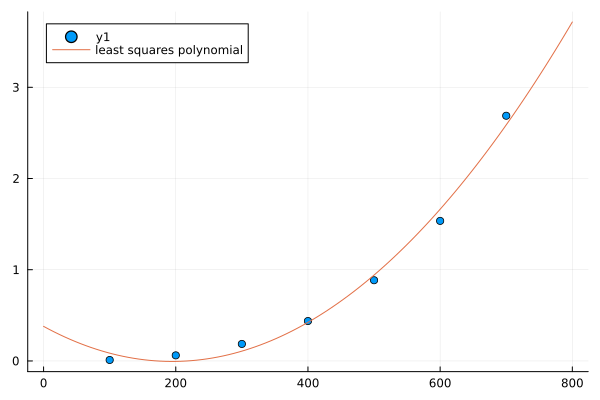

In [26]:
xs = 0:1:800
plot!(least_squares_polynomial, extrema(xs)..., label = "least squares polynomial")

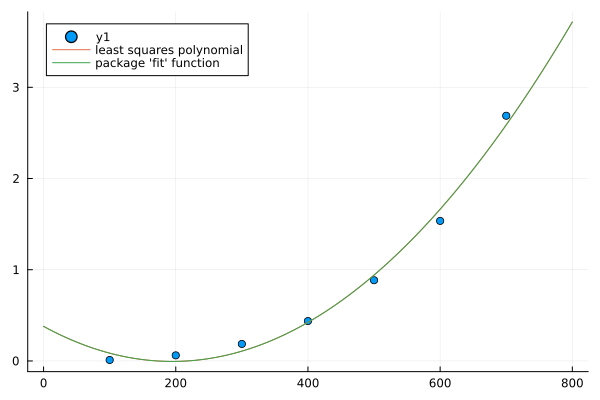

In [27]:
perfect_polynomial = fit(x, y, 2)
plot!(perfect_polynomial, extrema(xs)..., label="package 'fit' function")

# Zadanie 3 (2 pkt)

Znajdź i zaprezentuj działanie innego zastosowania wybranej faktoryzacji. Przykładowe (ale nie jedyne!) tematy:

-    tworzenie pseudoinversji macierzy (http://buzzard.ups.edu/courses/2014spring/420projects/math420-UPS-spring-2014-macausland-pseudo-inverse-present.pdf).

-   uzycie faktoryzacji QR do znajdowania wartości własnych (https://en.wikipedia.org/wiki/QR_algorithm)

-  zastosowanie faktoryzacji SVD - np. zastosowania w uczeniu maszynowym 

